In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
titn=pd.read_csv("tested.csv")
titn[titn.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
male_survived_age_median = titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 1), 'Age'].median()
male_death_age_median = titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 0), 'Age'].median()
female_survived_age_median = titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 1), 'Age'].median()
female_death_age_median = titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 0), 'Age'].median()

In [5]:
titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 1), 'Age'] = titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 1), 'Age'].fillna(male_survived_age_median)

In [6]:
titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 0), 'Age'] = titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 0), 'Age'].fillna(male_death_age_median)

In [7]:
titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 1), 'Age'] = titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 1), 'Age'].fillna(female_survived_age_median)

In [ ]:
titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 0), 'Age'] = titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 0), 'Age'].fillna(female_death_age_median)

In [8]:
target=titn.Survived

In [9]:
inputs=titn[['Pclass','Sex','Age','Fare']]
inputs

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875
...,...,...,...,...
413,3,male,27.0,8.0500
414,1,female,39.0,108.9000
415,3,male,38.5,7.2500
416,3,male,27.0,8.0500


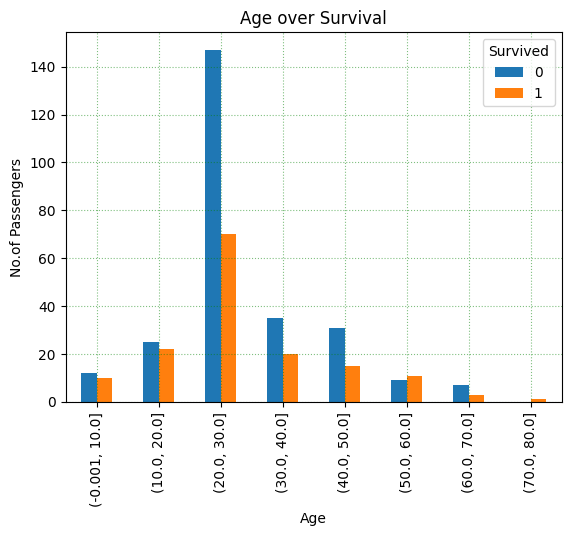

In [11]:
age_groups = pd.cut(titn['Age'], bins=range(0, 100, 10), include_lowest=True)
pd.crosstab(age_groups,titn.Survived).plot(kind='bar')
plt.ylabel('No.of Passengers')
plt.title('Age over Survival')
plt.grid(color="green", linestyle=":", alpha=0.5)

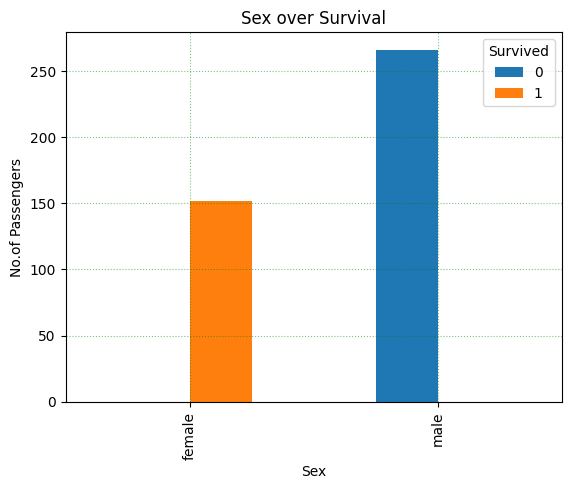

In [13]:
pd.crosstab(titn.Sex,titn.Survived).plot(kind='bar')
plt.ylabel('No.of Passengers')
plt.title('Sex over Survival')
plt.grid(color="green", linestyle=":", alpha=0.5)

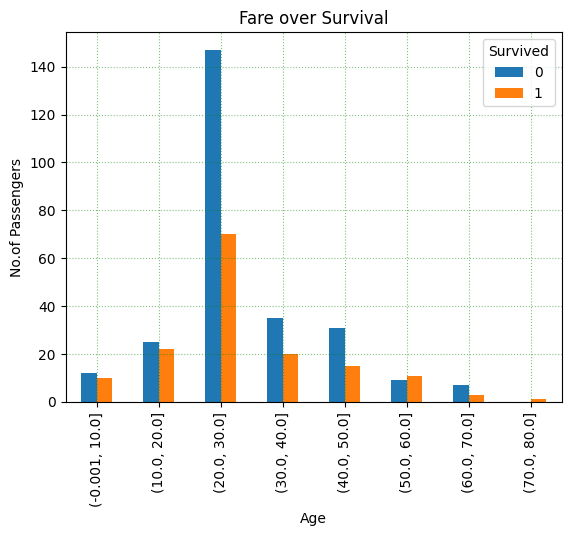

In [15]:
fare_groups = pd.cut(titn['Age'], bins=range(0, 550, 10), include_lowest=True)
pd.crosstab(fare_groups,titn.Survived).plot(kind='bar')
plt.ylabel('No.of Passengers')
plt.title('Fare over Survival')
plt.grid(color="green", linestyle=":", alpha=0.5)

In [16]:
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
inputs['Sex']=obj.fit_transform(inputs['Sex'])
inputs.head(4)

<ipython-input-16-50f35f44e7e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Sex']=obj.fit_transform(inputs['Sex'])


,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
